# 축산물 실시간 경매시황중계정보
---

#### 데이터 기간: 2013.01.01 - 2018.10.07

#### EDA

* 패키지 import 및 폰트 설정

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

* 경로 설정

In [2]:
os.chdir(r"C:\Users\a0105\Desktop\DSC\ddd\data")

* data load

In [3]:
price = pd.read_csv("01. 축산물 실시간 경매시황중계정보.csv",encoding='cp949')

* data 구조 확인

In [4]:
# 데이터 확인 
price.head(5)

,경매시간,경매기준시분초,경매 구분,경매 구분 명,도매시장코드,도매시장명,한우 평균경매 금액,한우 평균경매 금액_상승하강,한우 1B+ 경매단가,한우 3B 경매단가,...,육우 전날 경매금액 차이,육우 경매 예상 두수,육우 경매 두수,돼지 박피 경매 금액,돼지 박피 전날 경매금액 차이,돼지 박피 경매 두수,돼지 탕박 경매 금액,돼지 탕박 전날 경매금액 차이,돼지 탕박 경매 두수,돼지 경매 두수
0,20181007,235916,753003,경매용+지육상장,1201,신흥산업,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20181007,235916,753003,경매용+지육상장,0905,농협고령,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20181007,235916,753003,경매용+지육상장,1005,김해축공,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20181007,235916,753003,경매용+지육상장,0613,관성(홍성),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20181007,235916,753003,경매용+지육상장,0513,농협음성,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
## 자료 구조 확인 
# 각 열의 자료형과 메모리 사용량을 알 수 있음.
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34957 entries, 0 to 34956
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   경매시간              34957 non-null  int64 
 1   경매기준시분초           34957 non-null  int64 
 2   경매 구분             34957 non-null  int64 
 3   경매 구분 명           34957 non-null  object
 4   도매시장코드            34957 non-null  object
 5   도매시장명             34957 non-null  object
 6   한우 평균경매 금액        34957 non-null  int64 
 7   한우 평균경매 금액_상승하강   34957 non-null  int64 
 8   한우 1B+ 경매단가       34957 non-null  int64 
 9   한우 3B 경매단가        34957 non-null  int64 
 10  한우 경매 예상 두수       34957 non-null  int64 
 11  한우 경매 낙찰 두수       34957 non-null  int64 
 12  육우 경매 금액          34957 non-null  int64 
 13  육우 전날 경매금액 차이     34957 non-null  int64 
 14  육우 경매 예상 두수       34957 non-null  int64 
 15  육우 경매 두수          34957 non-null  int64 
 16  돼지 박피 경매 금액       34957 non-null  int64 
 17  돼지 박피 전날 경매금

* 총 34,957개의 행과 23개의 열을 가지고 있음.   
* 모든 열에 null값 없음

In [6]:
# 필요한 컬럼만 추출 
price2 = price[['경매시간','경매 구분 명','도매시장명','한우 평균경매 금액','돼지 박피 경매 금액','돼지 탕박 경매 금액']]

#### 변수 설명

- 경매구분명
    - 경매용: 산지
    - 지육상장용: 도체
        - 소나 돼지 같은 것을 도살하여 머리·내장·족(足)을 잘라 내고 아직 각을 뜨지 않은 고기	

* 돼지 박피, 돼지 탕박
    - 돼지 박피: 도축과정에서 인력이나 기계로 돼지가죽을 벗기는 작업 방식
        - 돼지 박피는 2017.12.11 부로 전면 중단된 방식 
    - 돼지 탕박: 뜨거운 물에 담그거나 물을 뿌려 털을 뽑는 도축 방식
    
    ##### 돼지 박피는 중단된 방식이기 때문에 공통적인 돼지 탕박만 볼 것임.

In [7]:
del price2['돼지 박피 경매 금액']

In [8]:
# 경매용과 지육상장용 데이터셋 생성
price2 = price2[price2['경매 구분 명']=='경매용+지육상장']

In [9]:
price2.head()

,경매시간,경매 구분 명,도매시장명,한우 평균경매 금액,돼지 탕박 경매 금액
0,20181007,경매용+지육상장,신흥산업,0,0
1,20181007,경매용+지육상장,농협고령,0,0
2,20181007,경매용+지육상장,김해축공,0,0
3,20181007,경매용+지육상장,관성(홍성),0,0
4,20181007,경매용+지육상장,농협음성,0,0


#### 시각화

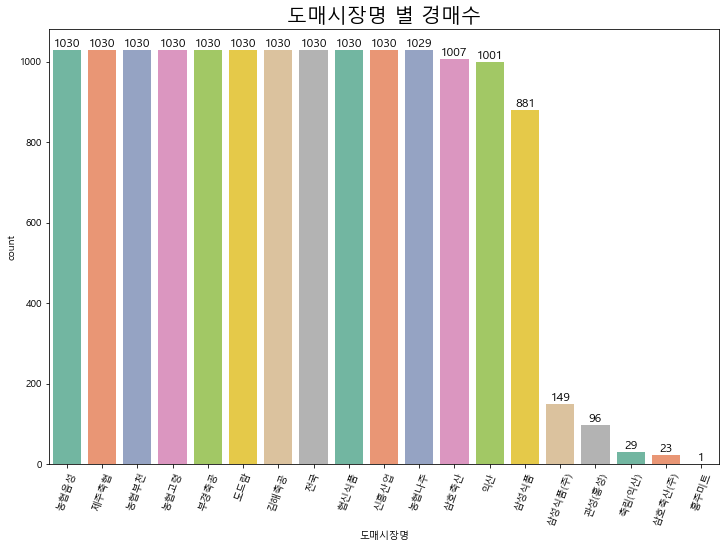

In [10]:
# 시각화 화면 키우기 
plt.figure(figsize=(12,8))

# x축 글자 회전
plt.xticks(rotation = 70 )
# 값 내림차순 정렬
order_ = price2['도매시장명'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x = '도매시장명', data = price2, order = order_ ,palette ='Set2')

# 제목 설정
ax.set_title('도매시장명 별 경매수', fontsize = 20)

# 값 표시 
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [19]:
# 경매시간 자료형을 날짜로 변환
price2['경매시간'] = pd.to_datetime(price2['경매시간'],format='%Y%m%d')
price2['year'] = price2['경매시간'].dt.year
price2['month'] = price2['경매시간'].dt.month

# 도매시장명이 전국인 것만 추출 
price_jeoun = price2[price2['도매시장명']=='전국']
price_jeoun['한우 평균경매 금액'].describe()

count     1030.000000
mean     10011.446602
std       6798.090624
min          0.000000
25%          0.000000
50%      13392.500000
75%      14454.750000
max      20019.000000
Name: 한우 평균경매 금액, dtype: float64

* '도매시장명: 전국'을 사용하는 이유는 가축사육현황 데이터가 지역별로 나눠져 있지 않기 때문.

In [21]:
# 도매시장명이 전국인 것만 추출 
price_jeoun2 = price_jeoun[price_jeoun['한우 평균경매 금액']!=0]
price_jeoun2['한우 평균경매 금액'].describe()

count      720.000000
mean     14321.930556
std       2078.246107
min       8100.000000
25%      13190.000000
50%      14034.000000
75%      15074.250000
max      20019.000000
Name: 한우 평균경매 금액, dtype: float64

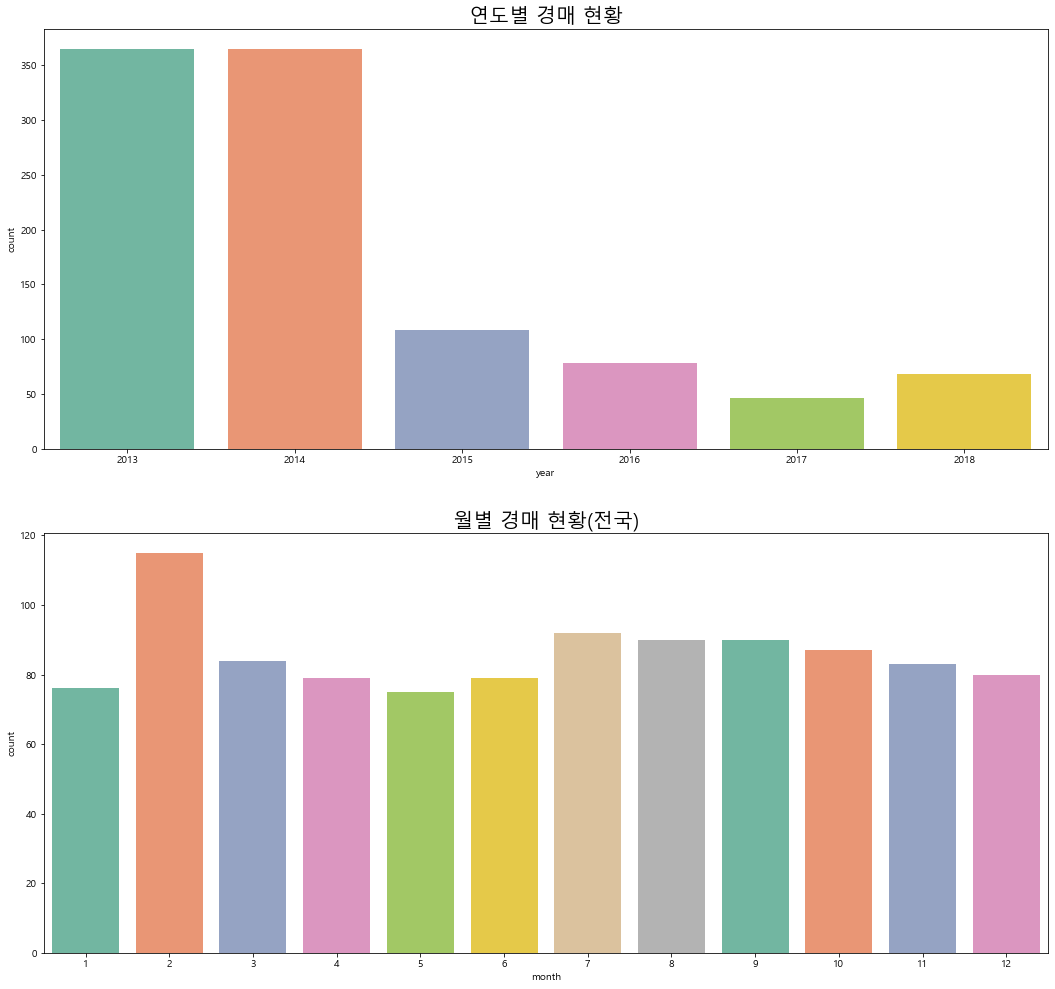

In [71]:
figure, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)

figure.set_size_inches(18,17)

sns.countplot(x='year',data=price_jeoun, palette ='Set2', ax = ax1)

ax1.set_title('연도별 경매 현황',fontsize = 20)

for p in ax.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

sns.countplot(x='month',data=price_jeoun,palette='Set2', ax = ax2)

ax2.set_title('월별 경매 현황(전국)',fontsize = 20)

for p in ax.patches:
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

* 월별, 연도별 경매현황이 일정하지 않은 이유는 경매시장이 안열릴 때도 있기 때문이다.   
* 비어있는 일자는 신경쓰지 않고 분석이 가능하다.

Text(0.5, 1.0, '한우 평균경매 금액(0제외) boxplot')

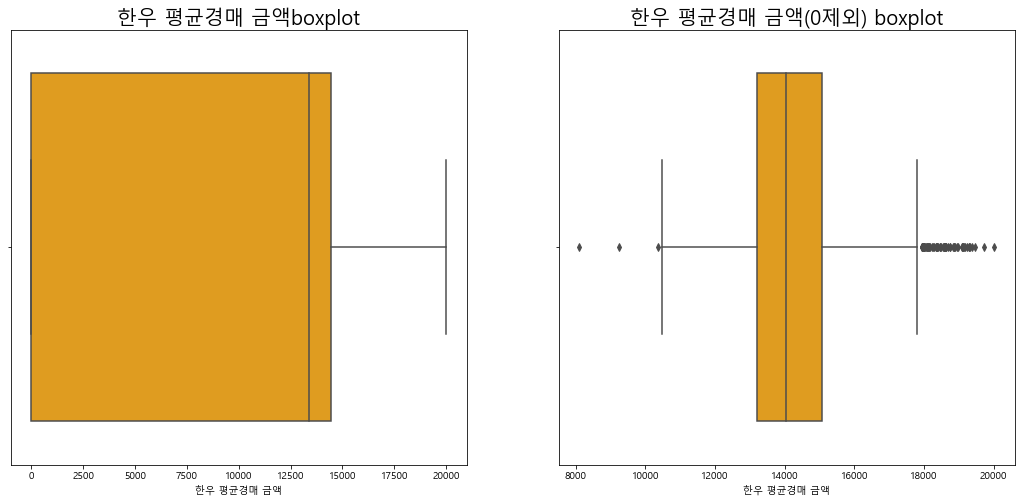

In [23]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(18,8)

sns.boxplot(x='한우 평균경매 금액',data=price_jeoun, color = 'orange', ax = ax1)
sns.boxplot(x='한우 평균경매 금액',data=price_jeoun2, color = 'orange', ax = ax2)

ax1.set_title('한우 평균경매 금액boxplot',fontsize = 20)
ax2.set_title('한우 평균경매 금액(0제외) boxplot',fontsize = 20)

* 이상치 존재하지 않음

Text(0.5, 1.0, '일별 한우 평균경매 금액 추이(전국)')

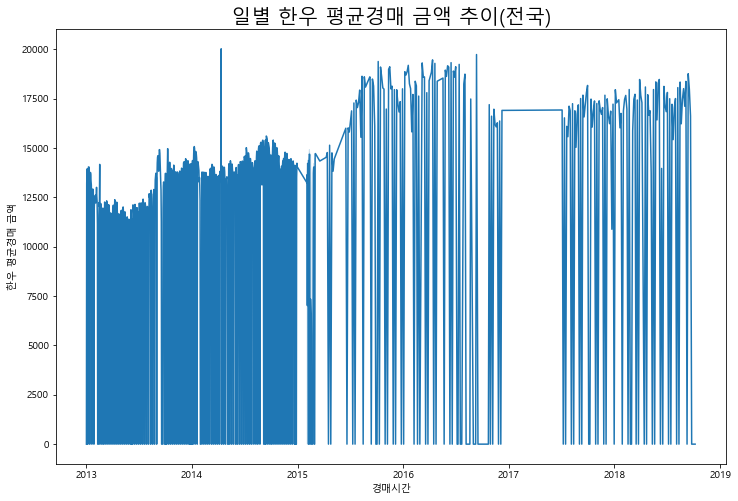

In [24]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data=price_jeoun)

ax.set_title('일별 한우 평균경매 금액 추이(전국)',fontsize = 20)

* 경매시장이 문닫는 날도 있기 때문에 그래프 모양이 이상한 것
* 문닫는날은 제외하고 plot

In [25]:
price_jeoun2 = price_jeoun[price_jeoun['한우 평균경매 금액']!=0]

In [27]:
price_jeoun2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 61 to 34896
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   경매시간         720 non-null    datetime64[ns]
 1   경매 구분 명      720 non-null    object        
 2   도매시장명        720 non-null    object        
 3   한우 평균경매 금액   720 non-null    int64         
 4   돼지 탕박 경매 금액  720 non-null    int64         
 5   year         720 non-null    int64         
 6   month        720 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 45.0+ KB


Text(0.5, 1.0, '일별 한우 평균경매 금액 추이(전국_2018년)')

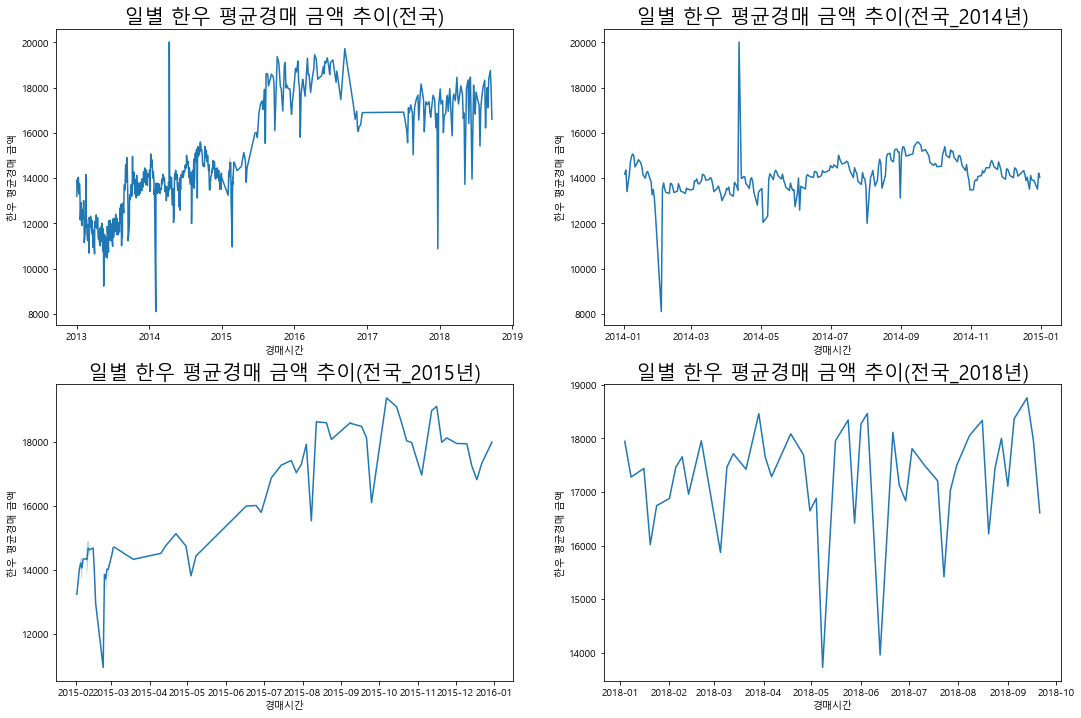

In [28]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(18,12)

sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data=price_jeoun2, ax = ax1)
sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = price_jeoun2[price_jeoun2['year']==2014], ax = ax2)
sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = price_jeoun2[price_jeoun2['year']==2015], ax = ax3)
sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = price_jeoun2[price_jeoun2['year']==2018], ax = ax4)


ax1.set_title('일별 한우 평균경매 금액 추이(전국)',fontsize = 20)
ax2.set_title('일별 한우 평균경매 금액 추이(전국_2014년)',fontsize = 20)
ax3.set_title('일별 한우 평균경매 금액 추이(전국_2015년)',fontsize = 20)
ax4.set_title('일별 한우 평균경매 금액 추이(전국_2018년)',fontsize = 20)


* 전체적으로 한우 평균금액이 증가하는 추세를 보이는듯하나 2016년에 비해 다소 감소
* 2014년에 눈에 띄는 peak가 2번, 2015년에 1번, 2018년에 3번 정도 보임
* 경매 가격에 특정 패턴이 있어 보이진 않음.

* 2014년과 2015년 모두 2월과 3월 사이, 8월과 9월 사이(9월 오르기 직전) 잠깐 내려가는 형태를 보임.

Text(0.5, 1.0, '돼지 탕박 경매 금액 boxplot')

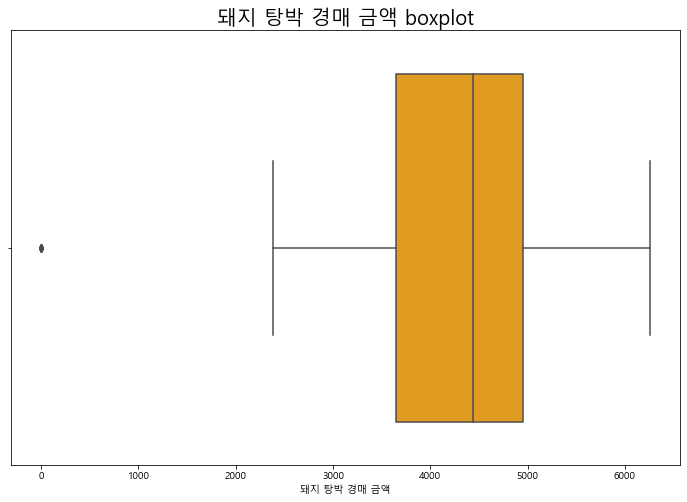

In [29]:
plt.figure(figsize=(12,8))

ax = sns.boxplot(x='돼지 탕박 경매 금액',data=price_jeoun2, color = 'orange')

ax.set_title('돼지 탕박 경매 금액 boxplot',fontsize = 20)

* 0만 이상치로 잡힘.

In [30]:
group_mean = price_jeoun2.groupby(['year','month']).mean()

In [31]:
group_mean_reset = pd.DataFrame(group_mean).reset_index()

In [32]:
group_mean_reset

,year,month,한우 평균경매 금액,돼지 탕박 경매 금액
0,2013,1,13091.958333,2986.791667
1,2013,2,12161.380952,2751.142857
2,2013,3,11789.850000,2808.100000
3,2013,4,11731.409091,3516.136364
4,2013,5,11229.043478,3385.000000
...,...,...,...,...
57,2018,5,16665.600000,4809.400000
58,2018,6,17129.000000,4423.333333
59,2018,7,17076.833333,5208.666667
60,2018,8,17612.400000,5277.000000


Text(0.5, 1.0, '연도별 월별 돼지 탕박 경매 금액')

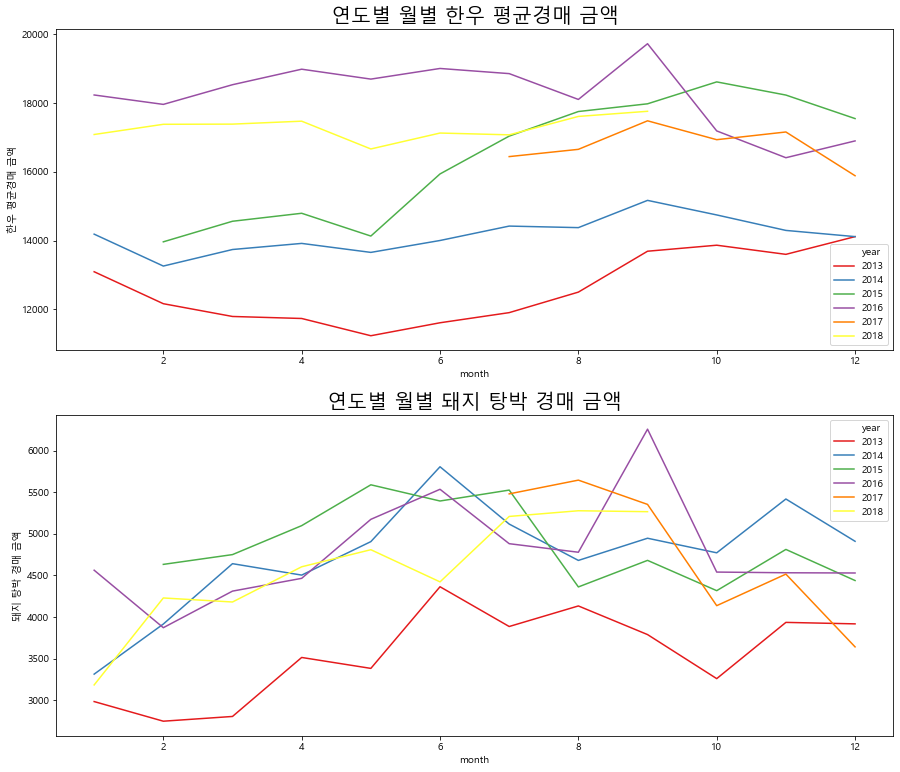

In [33]:
# 한우 평균경매 금액과 돼지 탕박 경매 금액 비교 
figure, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(15,13)

# sns.set_style("whitegrid")

sns.lineplot(x='month',y='한우 평균경매 금액', hue='year', markers=True,data = group_mean_reset, palette='Set1',ax=ax1)
sns.lineplot(x='month',y='돼지 탕박 경매 금액', hue='year', markers=True,data = group_mean_reset, palette='Set1',ax=ax2)

ax1.set_title("연도별 월별 한우 평균경매 금액",fontsize=20)
ax2.set_title("연도별 월별 돼지 탕박 경매 금액",fontsize=20)

* 전체적으로 한우 평균경매 금액은 5월에 가격이 가장 낮고 특일 정보와 확인해봐야겠지만 추석이 있을 것이라 추정되는 9월이 가장 높음.

Text(0.5, 1.0, '한우 평균경매 금액과 돼지 탕박 경매 금액')

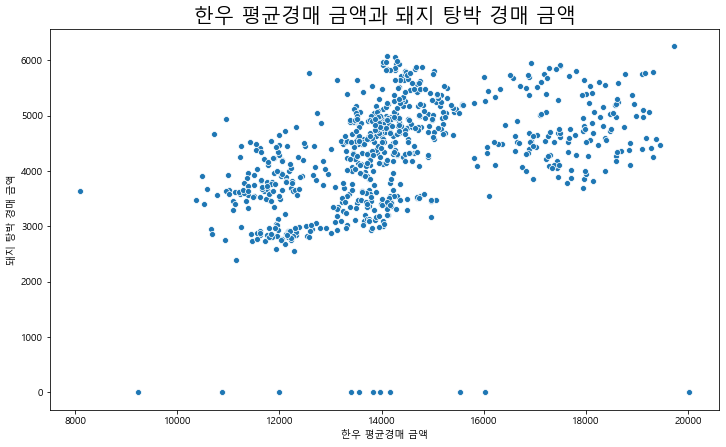

In [102]:
# 한우 평균경매 금액과 돼지 탕박 경매 금액 간의 관계 비교

plt.figure(figsize=(12,7))

sns.scatterplot(x='한우 평균경매 금액',y='돼지 탕박 경매 금액',data = price_jeoun2)

ax = plt.gca()

ax.set_title("한우 평균경매 금액과 돼지 탕박 경매 금액",fontsize=20)


* 양의 선형관계를 갖는 것으로 보임.

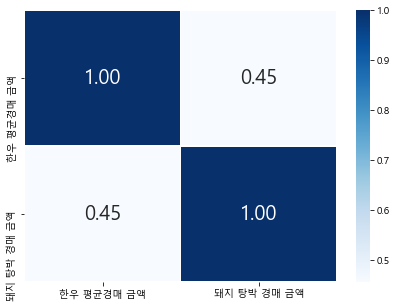

In [35]:
# 상관관계
corr_data = group_mean_reset.drop(["year","month"], axis=1)
corr = corr_data.corr()

plt.figure(figsize=(7,5))

sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues' , annot_kws={"size": 20})

* 상관성 검정결과 둘 사이의 상관성은 0.45로 양의 상관관계를 가진다고 할 수 있음. 

# 특일 정보
---

#### 데이터 기간: 2015-2018
*** 2013년과 2014년의 특일 정보는 수기로 작성 ***

* data load

In [36]:
holiday = pd.read_csv('09. 공휴일정보.csv',encoding='utf-8-sig')

In [37]:
holiday

,Unnamed: 0,공휴일명,공휴일여부,공휴일날짜
0,0,신정,Y,20150101
1,1,설날,Y,20150218
2,2,설날,Y,20150219
3,3,설날,Y,20150220
4,4,삼일절,Y,20150301
...,...,...,...,...
65,65,추석,Y,20180925
66,66,대체휴무일,Y,20180926
67,67,개천절,Y,20181003
68,68,한글날,Y,20181009


#### EDA

In [38]:
# 공휴일명이 설날과 추석인 것만 추출 
daemok = ['설날','추석']
holiday_daemok = holiday[holiday['공휴일명'].str.contains('|'.join(daemok))==True]

holiday_daemok = holiday_daemok[['공휴일명','공휴일날짜']]

holiday_daemok

,공휴일명,공휴일날짜
1,설날,20150218
2,설날,20150219
3,설날,20150220
9,추석,20150926
10,추석,20150927
11,추석,20150928
17,설날,20160207
18,설날,20160208
19,설날,20160209
27,추석,20160914


In [39]:
# 2013년 2014년 설날과 추석 직접 넣기
day = [20130209, 20130210, 20130211, 20140130, 20140131, 20140201,20130918, 20130919, 20130920, 20140907, 20140908, 20140909]

a = ['설날']*6
b = ['추석']*6

hol_ = a+b

In [40]:
hol_dict = pd.DataFrame({"공휴일명": hol_ ,"공휴일날짜": day})

holiday_daemok = pd.concat([holiday_daemok,hol_dict])

holiday_daemok = holiday_daemok.reset_index()

del holiday_daemok['index']

print(holiday_daemok.info())

print(holiday_daemok.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   공휴일명    36 non-null     object
 1   공휴일날짜   36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes
None
  공휴일명     공휴일날짜
0   설날  20150218
1   설날  20150219
2   설날  20150220
3   추석  20150926
4   추석  20150927


In [41]:
# 날짜형으로 변환 
holiday_daemok['공휴일날짜'] = pd.to_datetime(holiday_daemok['공휴일날짜'], format = '%Y%m%d')
holiday_daemok['공휴일날짜']

0    2015-02-18
1    2015-02-19
2    2015-02-20
3    2015-09-26
4    2015-09-27
5    2015-09-28
6    2016-02-07
7    2016-02-08
8    2016-02-09
9    2016-09-14
10   2016-09-15
11   2016-09-16
12   2017-01-27
13   2017-01-28
14   2017-01-29
15   2017-10-03
16   2017-10-04
17   2017-10-05
18   2018-02-15
19   2018-02-16
20   2018-02-17
21   2018-09-23
22   2018-09-24
23   2018-09-25
24   2013-02-09
25   2013-02-10
26   2013-02-11
27   2014-01-30
28   2014-01-31
29   2014-02-01
30   2013-09-18
31   2013-09-19
32   2013-09-20
33   2014-09-07
34   2014-09-08
35   2014-09-09
Name: 공휴일날짜, dtype: datetime64[ns]

In [42]:
merge_df = pd.merge(price_jeoun2,holiday_daemok,how='left',left_on = ['경매시간'], right_on = ['공휴일날짜'])
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   경매시간         720 non-null    datetime64[ns]
 1   경매 구분 명      720 non-null    object        
 2   도매시장명        720 non-null    object        
 3   한우 평균경매 금액   720 non-null    int64         
 4   돼지 탕박 경매 금액  720 non-null    int64         
 5   year         720 non-null    int64         
 6   month        720 non-null    int64         
 7   공휴일명         0 non-null      object        
 8   공휴일날짜        0 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 56.2+ KB


* 명절에 장이 열리지 않아 겹치지 않음

In [43]:
# 공휴일날짜를 기준으로 정렬 후 index 순서를 맞춰줌.
holiday_daemok = holiday_daemok.sort_values('공휴일날짜')

holiday_daemok = holiday_daemok.reset_index()
del holiday_daemok['index']

In [44]:
# 명절 시작하는 날 기준으로 나눔
a = []

for i in range(len(holiday_daemok)):
    if i%3 == 0:
        a.append(holiday_daemok['공휴일날짜'][i])

In [45]:
a

[Timestamp('2013-02-09 00:00:00'),
 Timestamp('2013-09-18 00:00:00'),
 Timestamp('2014-01-30 00:00:00'),
 Timestamp('2014-09-07 00:00:00'),
 Timestamp('2015-02-18 00:00:00'),
 Timestamp('2015-09-26 00:00:00'),
 Timestamp('2016-02-07 00:00:00'),
 Timestamp('2016-09-14 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-10-03 00:00:00'),
 Timestamp('2018-02-15 00:00:00'),
 Timestamp('2018-09-23 00:00:00')]

In [46]:
# 시간형태 변환 
a = pd.to_datetime(a,format='%Y-%m-%d')

In [47]:
a

DatetimeIndex(['2013-02-09', '2013-09-18', '2014-01-30', '2014-09-07',
               '2015-02-18', '2015-09-26', '2016-02-07', '2016-09-14',
               '2017-01-27', '2017-10-03', '2018-02-15', '2018-09-23'],
              dtype='datetime64[ns]', freq=None)

In [48]:
# 이주동안의 기간을 두고 분석하기 위함
date_14_total = []

for daemok in a:
    date_14 = pd.date_range(daemok-pd.DateOffset(days=14), daemok) 
    date_14_total.append(date_14)
    print(daemok)
    print("----")
    print(date_14)

2013-02-09 00:00:00
----
DatetimeIndex(['2013-01-26', '2013-01-27', '2013-01-28', '2013-01-29',
               '2013-01-30', '2013-01-31', '2013-02-01', '2013-02-02',
               '2013-02-03', '2013-02-04', '2013-02-05', '2013-02-06',
               '2013-02-07', '2013-02-08', '2013-02-09'],
              dtype='datetime64[ns]', freq='D')
2013-09-18 00:00:00
----
DatetimeIndex(['2013-09-04', '2013-09-05', '2013-09-06', '2013-09-07',
               '2013-09-08', '2013-09-09', '2013-09-10', '2013-09-11',
               '2013-09-12', '2013-09-13', '2013-09-14', '2013-09-15',
               '2013-09-16', '2013-09-17', '2013-09-18'],
              dtype='datetime64[ns]', freq='D')
2014-01-30 00:00:00
----
DatetimeIndex(['2014-01-16', '2014-01-17', '2014-01-18', '2014-01-19',
               '2014-01-20', '2014-01-21', '2014-01-22', '2014-01-23',
               '2014-01-24', '2014-01-25', '2014-01-26', '2014-01-27',
               '2014-01-28', '2014-01-29', '2014-01-30'],
              dt

In [49]:
date_14_total

[DatetimeIndex(['2013-01-26', '2013-01-27', '2013-01-28', '2013-01-29',
                '2013-01-30', '2013-01-31', '2013-02-01', '2013-02-02',
                '2013-02-03', '2013-02-04', '2013-02-05', '2013-02-06',
                '2013-02-07', '2013-02-08', '2013-02-09'],
               dtype='datetime64[ns]', freq='D'),
 DatetimeIndex(['2013-09-04', '2013-09-05', '2013-09-06', '2013-09-07',
                '2013-09-08', '2013-09-09', '2013-09-10', '2013-09-11',
                '2013-09-12', '2013-09-13', '2013-09-14', '2013-09-15',
                '2013-09-16', '2013-09-17', '2013-09-18'],
               dtype='datetime64[ns]', freq='D'),
 DatetimeIndex(['2014-01-16', '2014-01-17', '2014-01-18', '2014-01-19',
                '2014-01-20', '2014-01-21', '2014-01-22', '2014-01-23',
                '2014-01-24', '2014-01-25', '2014-01-26', '2014-01-27',
                '2014-01-28', '2014-01-29', '2014-01-30'],
               dtype='datetime64[ns]', freq='D'),
 DatetimeIndex(['2014-08-

In [103]:
# DatetimeIndex를 list로 변환 
merge_arrange_total = []

for day in date_14_total:
    merge_arrange = day.strftime("%Y-%m-%d").tolist()
    merge_arrange_total.append(merge_arrange)
    
# 2차원 리스트를 일차원으로 
merge_arrange_total = [y for x in merge_arrange_total for y in x]
len(merge_arrange_total)

180

In [52]:
# merge하기 위해 데이터프레임으로 변경 
date_df = pd.DataFrame(merge_arrange_total,columns=['날짜'])

date_df['날짜'].sort_values()

0      2013-01-26
1      2013-01-27
2      2013-01-28
3      2013-01-29
4      2013-01-30
          ...    
175    2018-09-19
176    2018-09-20
177    2018-09-21
178    2018-09-22
179    2018-09-23
Name: 날짜, Length: 180, dtype: object

In [53]:
date_df['날짜'] = pd.to_datetime(date_df['날짜'], format = '%Y-%m-%d')

merge_df = pd.merge(price_jeoun2,date_df,how='left',left_on = ['경매시간'], right_on = ['날짜'])

In [54]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   경매시간         720 non-null    datetime64[ns]
 1   경매 구분 명      720 non-null    object        
 2   도매시장명        720 non-null    object        
 3   한우 평균경매 금액   720 non-null    int64         
 4   돼지 탕박 경매 금액  720 non-null    int64         
 5   year         720 non-null    int64         
 6   month        720 non-null    int64         
 7   날짜           85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 50.6+ KB


In [73]:
merge_df.head()

,경매시간,경매 구분 명,도매시장명,한우 평균경매 금액,돼지 탕박 경매 금액,year,month,날짜,휴일유무
0,2018-09-21,경매용+지육상장,전국,16612,4369,2018,9,2018-09-21 00:00:00,1
1,2018-09-17,경매용+지육상장,전국,17965,5641,2018,9,2018-09-17 00:00:00,1
2,2018-09-13,경매용+지육상장,전국,18757,5754,2018,9,2018-09-13 00:00:00,1
3,2018-09-05,경매용+지육상장,전국,18369,5548,2018,9,0,0
4,2018-09-01,경매용+지육상장,전국,17108,5017,2018,9,0,0


In [77]:
print(merge_df['경매 구분 명'].value_counts())
print(merge_df['도매시장명'].value_counts())

경매용+지육상장    720
Name: 경매 구분 명, dtype: int64
전국    720
Name: 도매시장명, dtype: int64


In [55]:
# 결측치 0으로 대체 
merge_df['날짜'].isnull().sum()

merge_df['날짜'] = merge_df['날짜'].fillna(0)

In [56]:
# 휴일유무 컬럼 생성 
merge_df['휴일유무'] = merge_df['날짜'].apply(lambda x: 1 if x!=0 else x)

merge_df['휴일유무'].value_counts()

0    635
1     85
Name: 휴일유무, dtype: int64

Text(0.5, 1.0, '경매시간과 휴일유무 관계')

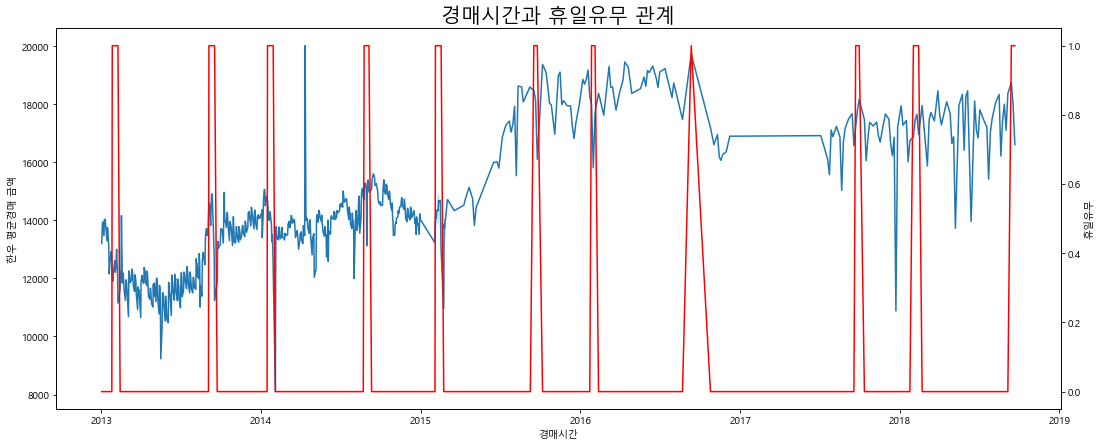

In [92]:
# 경매시간과 휴일유무 관계 파악 
plt.figure(figsize=(18,7))

ax1 = sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = merge_df)

ax1.twinx()

sns.lineplot(x='경매시간',y = '휴일유무',data = merge_df, color = 'red')

ax1.set_title('경매시간과 휴일유무 관계', fontsize = 20)


Text(0.5, 1.0, '경매시간과 휴일유무 관계(2014)')

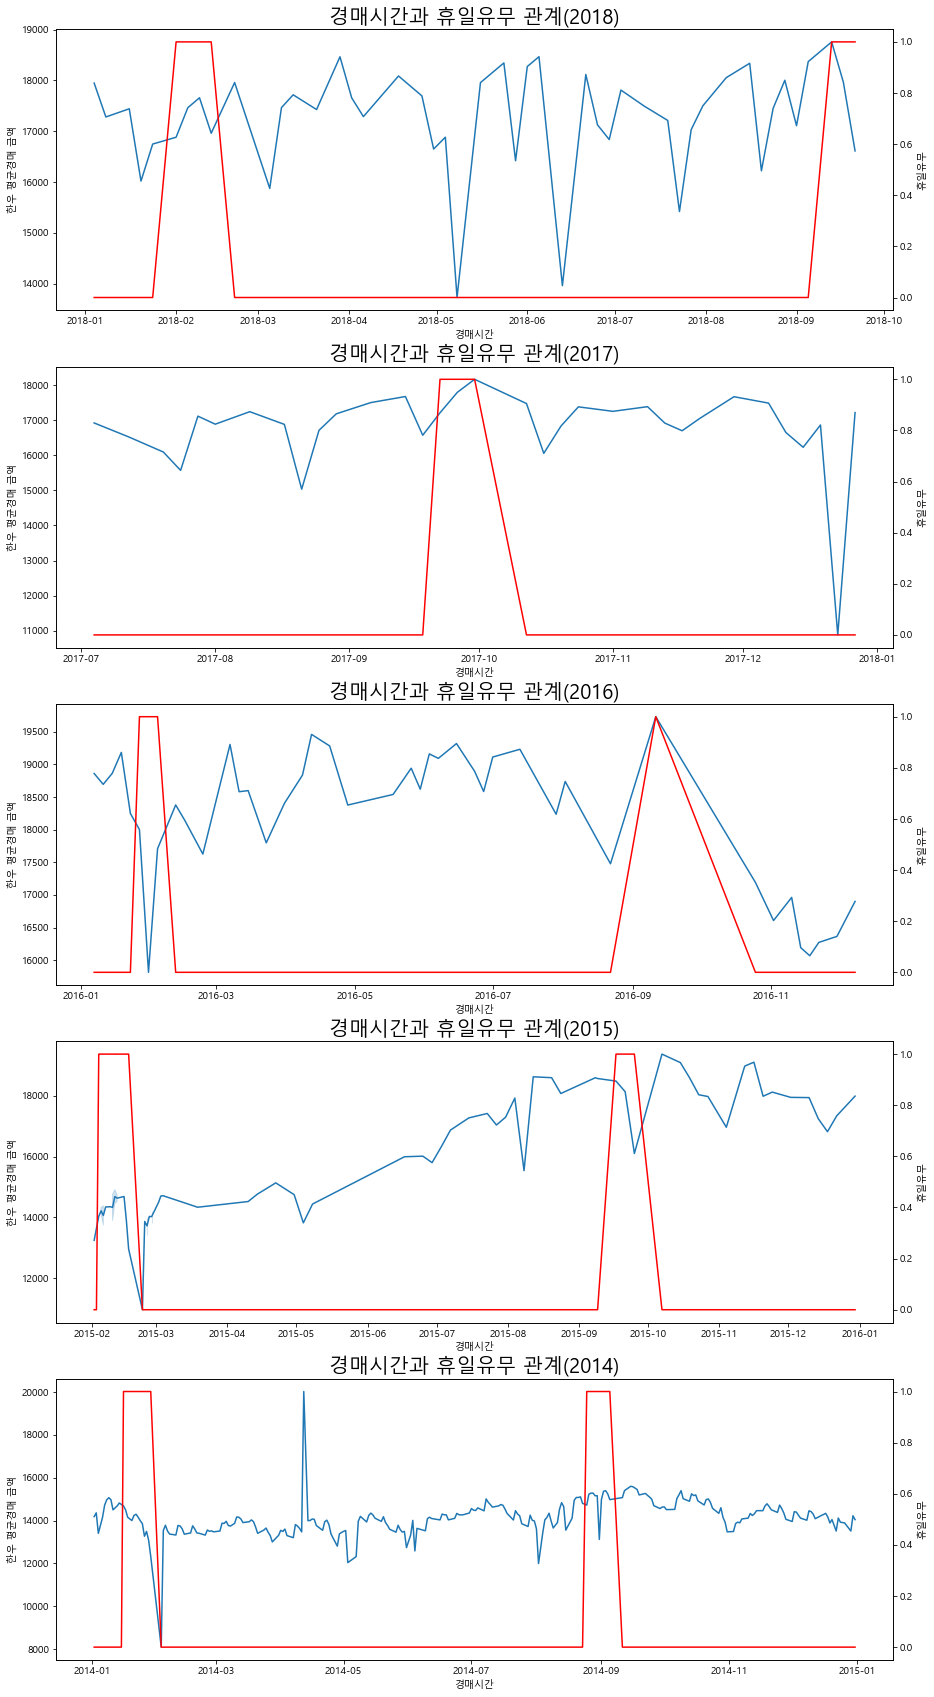

In [95]:
figure, ((ax2, ax3, ax4, ax5, ax6)) = plt.subplots(nrows = 5,ncols = 1)
figure.set_size_inches(15,30)

sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = merge_df[merge_df['year']==2018], ax = ax2)

ax2.twinx()

sns.lineplot(x='경매시간',y = '휴일유무',data = merge_df[merge_df['year']==2018], color = 'red')

ax2.set_title('경매시간과 휴일유무 관계(2018)', fontsize = 20)

sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = merge_df[merge_df['year']==2017], ax = ax3)

ax3.twinx()

sns.lineplot(x='경매시간',y = '휴일유무',data = merge_df[merge_df['year']==2017], color = 'red')

ax3.set_title('경매시간과 휴일유무 관계(2017)', fontsize = 20)

sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = merge_df[merge_df['year']==2016], ax = ax4)

ax4.twinx()

sns.lineplot(x='경매시간',y = '휴일유무',data = merge_df[merge_df['year']==2016], color = 'red')

ax4.set_title('경매시간과 휴일유무 관계(2016)', fontsize = 20)

sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = merge_df[merge_df['year']==2015], ax = ax5)

ax5.twinx()

sns.lineplot(x='경매시간',y = '휴일유무',data = merge_df[merge_df['year']==2015], color = 'red')

ax5.set_title('경매시간과 휴일유무 관계(2015)', fontsize = 20)

sns.lineplot(x='경매시간',y = '한우 평균경매 금액',data = merge_df[merge_df['year']==2014], ax = ax6)

ax6.twinx()

sns.lineplot(x='경매시간',y = '휴일유무',data = merge_df[merge_df['year']==2014], color = 'red')

ax6.set_title('경매시간과 휴일유무 관계(2014)', fontsize = 20)

In [58]:
# 명목형변수와 연속형 변수의 상관관계
from scipy import stats

stats.pointbiserialr(merge_df['한우 평균경매 금액'], merge_df['휴일유무'])

PointbiserialrResult(correlation=0.05358186363863627, pvalue=0.15092095789854837)

* 0.0905 (30일 기준)
* 0.0766 (21일 기준)
* 0.054 (14일 기준)

* 수치상으로는 관계가 없어보이지만 시각화상으로 2016년을 제외한 나머지 부분에서는 높은 가격을 차지하고 있는 것으로 보임.
* 2015년 그래프에서 설날에 가격이 낮은 것처럼 보이지만 2014년 하반기를 확인하면 그 전에 비해 가격이 상승한 것을 확인할 수 있음.

### 결과
---

#### 축산물 실시간 경매 가격

* 경매 가격 주 0인 값들을 포함하면 이상값 다수 발생
    * 경매 시세 중 0인 시세를 예측하는 것이 아니기 때문에 제외하는 것이 옳다고 판단됨.

#### 축산물 실시간 경매 가격 중 한우 평균 경매 금액과 돼지 탕박 경매 금액

* 돼지 탕박의 경우 0값만 이상치로 인지
    * 돼지 탕박의 0값은 한우 평균 경매 금액과 달리 독립변수 자체이므로 제외하지 않아도 될 것으로 판단됨. 
* 두 변수 상관계수 값은 0.45로 양의 상관관계를 갖음.

#### 한우 평균 경매 금액과 특일 정보 중 설날, 추석과의 관계

* https://www.hankyung.com/economy/article/2020010962051 해당 뉴스를 참고하여 특일 정보 시작날짜 기준 14일 전에 값 1을 부여하여 관계 파악
* 14일 기준 상관계수 값은 0.054로 상관성이 없어보이지만 시각화상으로 보았을때 연도별로 어느 정도 관계를 미치는 것으로 보임.

In [78]:
merge_df.to_pickle('축산물_공휴일.pkl')